<a href="https://colab.research.google.com/github/Untick/NetOptik/blob/main/Brutyan%20Ruben/2_%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C_%D0%BC%D0%B0%D1%82%D0%B5%D1%80%D0%B8%D0%B0%D0%BB%D1%8B_(%D1%81_VGG16).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Папки для 2-х классов цветных изображений (0 - комбинированные, 1 - металл, 2 - пластик)

In [ ]:
!mkdir '/content/drive/MyDrive/НетОптик/Dataset/'           # создаём папку Dataset
!mkdir '/content/drive/MyDrive/НетОптик/Dataset/train'      # создаём папку train - обучающие фото
!mkdir '/content/drive/MyDrive/НетОптик/Dataset/test'       # создаём папку test - тестовые фото

mkdir: cannot create directory ‘/content/drive/MyDrive/НетОптик/Dataset/’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/НетОптик/Dataset/train’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/НетОптик/Dataset/test’: File exists


Проверяем текущее местоположение

In [ ]:
print("Текущее местоположение:")
!pwd

print("\nСодержание папки Dataset:")
! ls --format=single-column /content/drive/MyDrive/НетОптик/Dataset

Текущее местоположение:
/content

Содержание папки Dataset:
DS_2classes
DS_3classes


# Загрузка библиотек

In [ ]:
import os # Для работы с файлами

import numpy as np

from tensorflow.keras.models import Sequential                                                                 # абстрактный класс базовой модели сети от keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, Flatten  # слои(нормализации, регуляризации и т.д)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import utils

from tensorflow.keras.preprocessing.image import ImageDataGenerator                     # модуль ImageDataGenerator из библиотеки tensorflow

import matplotlib.pyplot as plt     # для создания графиков и визуализаций в Python
import random                       # для генерации случайных чисел
from PIL import Image               # методы для отрисовки изображений, обработки и манипулирования изображениями

from tensorflow.keras.preprocessing import image

# Начальные данные:

## Определение переменных

In [ ]:
# Параметры для ImageDataGenerator:
batch_size = 32
img_height = 450
img_width = 675

# Пути к папкам Train/Test
train_dir = '/content/drive/MyDrive/НетОптик/Dataset/DS_2classes/train'
test_dir = '/content/drive/MyDrive/НетОптик/Dataset/DS_2classes/test'
test_dir_a = '/content/drive/MyDrive/НетОптик/Dataset/DS_2classes/augment'      # Путь к папке augment с аугментированными Test изображениями

# Пути к классам Train/Test
TRAIN_IMAGE_PATH_1p = f'{train_dir}/class_1p'
TRAIN_IMAGE_PATH_2m = f'{train_dir}/class_2m'
TEST_IMAGE_PATH_1p = f'{test_dir}/class_1p'
TEST_IMAGE_PATH_2m = f'{test_dir}/class_2m'
TEST_IMAGE_PATH_1p_a = f'{test_dir_a}/class_1p'                                 # Пути к классам аугментированных Test
TEST_IMAGE_PATH_2m_a = f'{test_dir_a}/class_2m'

# Список имен классов для Train/Test
TRAIN_CLASS_LIST = sorted(os.listdir(train_dir))
TEST_CLASS_LIST = sorted(os.listdir(test_dir))
TEST_CLASS_LIST_a = sorted(os.listdir(test_dir_a))                              # Список имен классов для аугментированных Test

# Количество классов для Train/Test
TRAIN_CLASS_COUNT = len(TRAIN_CLASS_LIST)
TEST_CLASS_COUNT = len(TEST_CLASS_LIST)
TEST_CLASS_COUNT_a = len(TEST_CLASS_LIST_a)                                     # Количество классов для аугментированных Test

# Количество изображений из всех классов для Train/Test
train_samples = len(os.listdir(TRAIN_IMAGE_PATH_1p)) + len(os.listdir(TRAIN_IMAGE_PATH_2m))
test_samples = len(os.listdir(TEST_IMAGE_PATH_1p)) + len(os.listdir(TEST_IMAGE_PATH_2m))
test_samples_a = len(os.listdir(TEST_IMAGE_PATH_1p_a)) + len(os.listdir(TEST_IMAGE_PATH_2m_a))  # Количество изображений из всех классов для аугментированных Test

# Размерность тензора на основе изображения для входных данных в нейронную сеть (выбираем вид backend Tensorflow, channels_last)
input_shape = (img_height, img_width, 3)

# Процент отводимый на валидацию от общего количества обучающей Train выборки
validation_split = 0.2

### **Проверка:**

### *Нач. переменных*

In [ ]:
# Проверка результата
print(f'Подпапки для обучения train_dir: {os.listdir(train_dir)}')
print(f'Подпапки для проверки test_dir: {os.listdir(test_dir)}\n')
print(f'Метки обучающих классов TRAIN_CLASS_LIST: {TRAIN_CLASS_LIST}')
print(f'Метки проверочных классов TEST_CLASS_LIST: {TEST_CLASS_LIST}\n')
print(f'Количество обучающих классов TRAIN_CLASS_COUNT: {TRAIN_CLASS_COUNT}')
print(f'Количество проверочных классов TEST_CLASS_COUNT: {TEST_CLASS_COUNT}\n')
print(f"Количество Train-изображений из всех классов: {train_samples}")
print(f"Количество Test-изображений из всех классов: {test_samples}")
print(f"Количество Test-аугментированный изображений из всех классов: {test_samples_a}")

Подпапки для обучения train_dir: ['class_1p', 'class_2m']
Подпапки для проверки test_dir: ['class_1p', 'class_2m']

Метки обучающих классов TRAIN_CLASS_LIST: ['class_1p', 'class_2m']
Метки проверочных классов TEST_CLASS_LIST: ['class_1p', 'class_2m']

Количество обучающих классов TRAIN_CLASS_COUNT: 2
Количество проверочных классов TEST_CLASS_COUNT: 2

Количество Train-изображений из всех классов: 800
Количество Test-изображений из всех классов: 36
Количество Test-аугментированный изображений из всех классов: 144


### *Имена файлов картинок*

In [ ]:
# Список файлов для каждого класса Train
print("Подпапки в папке Train для обучения:")
for train_name_folder in TRAIN_CLASS_LIST:
  train_file_name = os.listdir(f'{train_dir}/{train_name_folder}/')
  print(f'\nВ папке "{train_name_folder}" всего {len(train_file_name)} картинок:\n{train_file_name}')

# Список файлов для каждого класса Test
print("\nПодпапки в папке Test для проверки:")
for test_name_folder in TEST_CLASS_LIST:
  test_file_name = os.listdir(f'{test_dir}/{test_name_folder}/')
  print(f'\nВ папке "{test_name_folder}" всего {len(test_file_name)} картинок:\n{test_file_name}')

Подпапки в папке Train для обучения:

В папке "class_1p" всего 400 картинок:
['baldessarini-b5103-b-s2-2 (1).jpg', 'baldessarini-b5103-b-s2-1 (2).jpg', 'carrera-ca6167-t29-s2-2 (1).jpg', 'carrera-ca6172-87u-s2-2 (5).jpg', 'carrera-ca6172-87u-s2-2 (6).jpg', 'carrera-ca6192-8c0-s2-2 (5).jpg', 'carrera-ca6609-dhr-s2-2 (1).jpg', 'carrera-ca6167-t29-s2-1 (2).jpg', 'carrera-ca6609-dhr-s2-1 (2).jpg', 'giorgio-armani-ga889-807-s2-2 (2).jpg', 'giorgio-armani-ga936-086-s2-2 (2).jpg', 'giorgio-armani-ga936-086-s2-1 (3).jpg', 'giorgio-armani-ga936-807-s2-2 (3).jpg', 'giorgio-armani-ga936-807-s2-1 (4).jpg', 'giorgio-armani-ga938-807-s2-2 (2).jpg', 'giorgio-armani-ga938-807-s2-1 (3).jpg', 'giorgio-armani-ga941-086-s2-2 (2).jpg', 'giorgio-armani-ga941-086-s2-1 (3).jpg', 'giorgio-armani-ga965-7c5-s2-2 (2).jpg', 'giorgio-armani-ga965-7c5-s2-1 (3).jpg', 'giorgio-armani-ga970-807-s2-2 (2).jpg', 'giorgio-armani-ga970-807-s2-1 (3).jpg', 'giorgio-armani-ar7065q-5029-s2-2 (2).jpg', 'giorgio-armani-ar7065q-50

### *Изображение каждого класса*

Случайное Train изображение из каждого класса (пластик и металл):


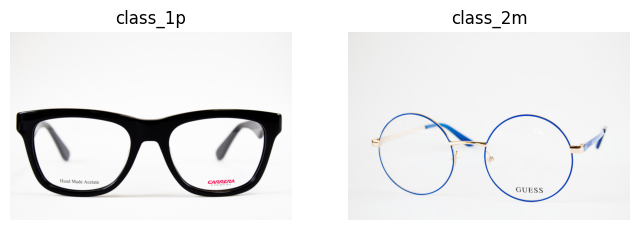

In [ ]:
# Создание заготовки для изображений всех классов
fig, axs = plt.subplots(1, TRAIN_CLASS_COUNT, figsize=(8, 4))

# Для всех номеров классов:
for i in range(TRAIN_CLASS_COUNT):

    # Формирование пути к папке содержимого класса
    class_path = f'{train_dir}/{TRAIN_CLASS_LIST[i]}/'

    # Выбор случайного фото из i-го класса
    img_path = class_path + random.choice(os.listdir(class_path))

    # Отображение фотографии
    axs[i].set_title(TRAIN_CLASS_LIST[i])
    axs[i].imshow(Image.open(img_path))
    axs[i].axis('off')

print('Случайное Train изображение из каждого класса (пластик и металл):')
# Отрисовка всего полотна
plt.show()


# Подготовка изображений

**ImageDataGenerator (генератор изображений)** - это класс в библиотеке Keras, который используется для различных преобразований к входным изображениям (увеличения, повороты, изменения размера, отражения и пр.)

Из генератора datagen создадим экземпляры обучающего/проверочного/тестового датагенератора: train_generator/val_generator/test_generator

Используем:
*   datagen.flow_from_directory - если изображения хранятся на диске.
*   datagen.flow(x_train, y_train, batch_size=32, subset='training') - если изображения уже подгружены в рабочую среду

## Генераторы - Train_Val_Test

Создаем генератор данных на основе изображений из каталога:

In [ ]:
from keras.applications.vgg16 import preprocess_input

# Создаем экземпляр класса ImageDataGenerator, который будет использоваться для генерации преобразованных изображений
# Генератор изображений с аугментацией данных:
datagen = ImageDataGenerator(
    # rescale=1. / 255,                             # Перескалирование значений пикселей изображений, чтобы они находились в диапазоне от 0 до 1
    rotation_range=12,                            # случайные повороты в диапазоне [-12, 12] градусов
    width_shift_range=3.0,                        # случайное горизонтальное смещение в диапазоне [-3.0, 3.0]
    height_shift_range=5.0 ,                      # случайное вертикальное смещение в диапазоне [-4.0, 4.0]
    zoom_range=0.2,                               # случайное масштабирование (увеличение или уменьшение) в диапазоне от 0.9 до 1.1 раз (если 0.2 - от 0.8 до 1.2)
    horizontal_flip=True,                         # Случайное отражение изображений по горизонтали
    validation_split=validation_split,            # доля отводимая на валидацию от общего количества фото для валидации
    preprocessing_function=preprocess_input       # нормализация изображений, согласно предварительным требованиям VGG16
)

# Генератор данных для ОБУЧЕНИЯ на основе изображений из каталога
train_generator = datagen.flow_from_directory(
    train_dir,                                    # Путь к изображениям обучающей выборки
    target_size=(img_height, img_width),          # Размер изображений
    batch_size=batch_size,                        # Размер batch_size
    class_mode='binary',                          # Тип выборки
    # shuffle=False,                                # Не перемешивание выборки
    shuffle=True,                                 # Перемешивание выборки
    subset='training',                            # устанавливаем как набор для обучения
    seed=42                                       # начальное состояние генератора, позволяет повторять повторяемость результатов при каждом запуске кода
)
# Генератор данных для ПРОВЕРКИ на основе изображений из каталога
val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    # shuffle=False,
    shuffle=True,
    subset='validation',                          # Указываем, что это валидационная выборка
    seed=42
)
# Генератор для тестового набора данных, без аугментации
# test_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input                                     # нормализация изображений, согласно предварительным требованиям VGG16
)

# Генератор данных для ТЕСТИРОВАНИЯ на основе изображений из каталога
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    # shuffle=False,
    shuffle=True,
    seed=42
)
# Генератор данных для ТЕСТИРОВАНИЯ на основе изображений из каталога
test_generator_a = test_datagen.flow_from_directory(
    test_dir_a,                                                                  # Путь к тестовой выборке с аугментированными изображениями
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    # shuffle=True,
    seed=21
)

Found 640 images belonging to 2 classes.
Found 160 images belonging to 2 classes.
Found 36 images belonging to 2 classes.
Found 144 images belonging to 2 classes.


### Распределение меток (подбор)

Подбор seed=42 для равномерного распределения

In [ ]:
# Функция для подсчета меток
def Проверка_меток(arr):
    count_0 = np.count_nonzero(arr == 0)
    count_1 = np.count_nonzero(arr == 1)
    return count_0, count_1

# Функция для печати количества меток
def Печать_меток(count_0, count_1):
    print("Количество элементов сметкой 0 в массиве:", count_0)
    print("Количество элементов сметкой 1 в массиве:", count_1)

In [ ]:
# Получаем данные и соответствующие им метки для обучения
x_train, y_train = train_generator.next()

for i in range(len(TRAIN_CLASS_LIST)):
    print(f'У класса "{TRAIN_CLASS_LIST[i]}" метка-{i}.', end=' ')

print('\n\nРаспределение данных в y_train:')
count_0_train, count_1_train = Проверка_меток(np.array(y_train))
Печать_меток(count_0_train, count_1_train)

print(f'Всего: {count_0_train+count_1_train}')

У класса "class_1p" метка-0. У класса "class_2m" метка-1. 

Распределение данных в y_train:
Количество элементов сметкой 0 в массиве: 16
Количество элементов сметкой 1 в массиве: 16
Всего: 32


In [ ]:
# Получаем данные и соответствующие им метки для валидации
x_val, y_val = val_generator.next()

for i in range(len(TRAIN_CLASS_LIST)):
    print(f'У класса "{TRAIN_CLASS_LIST[i]}" метка-{i}.', end=' ')

print('\n\nРаспределение данных в y_val:')
count_0_val, count_1_val = Проверка_меток(np.array(y_val))
Печать_меток(count_0_val, count_1_val)

print(f'Всего: {count_0_val + count_1_val}')

У класса "class_1p" метка-0. У класса "class_2m" метка-1. 

Распределение данных в y_val:
Количество элементов сметкой 0 в массиве: 16
Количество элементов сметкой 1 в массиве: 16
Всего: 32


In [ ]:
# Получаем данные и соответствующие им метки для тестирования
x_test, y_test = test_generator.next()

for i in range(len(TEST_CLASS_LIST)):
    print(f'У класса "{TEST_CLASS_LIST[i]}" метка-{i}.', end=' ')

print('\n\n\nРаспределение данных в y_test:')
count_0_test, count_1_test = Проверка_меток(np.array(y_test))
Печать_меток(count_0_test, count_1_test)

print(f'Всего: {count_0_test + count_1_test}')

У класса "class_1p" метка-0. У класса "class_2m" метка-1. 


Распределение данных в y_test:
Количество элементов сметкой 0 в массиве: 16
Количество элементов сметкой 1 в массиве: 16
Всего: 32


In [ ]:
# Получаем данные и соответствующие им метки для тестирования
X_test, Y_test = test_generator_a.next()

for i in range(len(TEST_CLASS_LIST_a)):
    print(f'У класса "{TEST_CLASS_LIST_a[i]}" метка-{i}.', end=' ')

print('\n\n\nРаспределение данных в Y_test:')
count_0_test_a, count_1_test_a = Проверка_меток(np.array(Y_test))
Печать_меток(count_0_test_a, count_1_test_a)

print(f'Всего: {count_0_test_a + count_1_test_a}')

У класса "class_1p" метка-0. У класса "class_2m" метка-1. 


Распределение данных в Y_test:
Количество элементов сметкой 0 в массиве: 32
Количество элементов сметкой 1 в массиве: 0
Всего: 32


Вывод: seed=42 подобрано правильно, после перемешивания случайное распределение изображений по классам равномерное

### *Аугментация фото*

Проверяем работу генератора на аугментацию:

Изображение из Train-обучающей выборки:


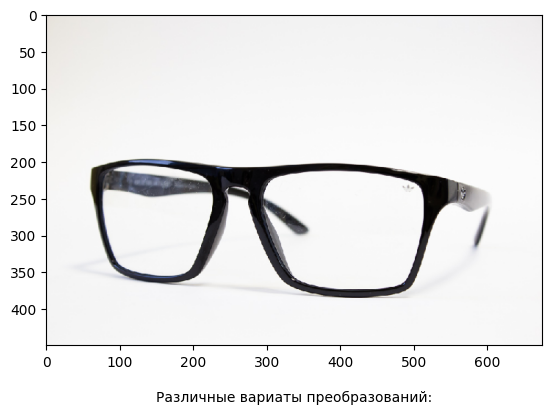

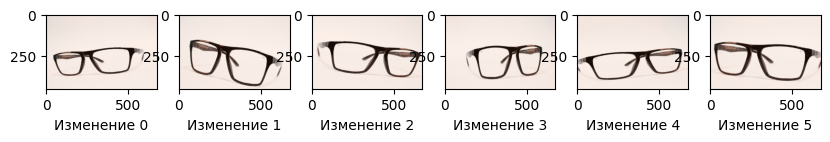

In [ ]:
# Изображение из Train
print('Изображение из Train-обучающей выборки:')
image_file_name = f'{train_dir}/class_1p' + '/adidas-ah57-6056-s2-1 (3).jpg'
img = image.load_img(image_file_name, target_size=(450, 675))
plt.xlabel("\nРазличные вариаты преобразований:")           # добавляем метку к изображению
plt.imshow(img)
# plt.show()

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
# Создание заготовки для изображений
fig, axs = plt.subplots(1, 6, figsize=(10, 5))

# различные виды сгенерированных изображений
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(1, 6, i+1)                      # изменяем параметры subplot для вывода в одну строку
    plt.xlabel("Изменение " + str(i))           # добавляем метку к изображению
    plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 6 == 0:
        break

plt.show()

## X_ , Y_ выборки:

Сгенерируем выборку в виде уже готовых X_train, Y_train, с помощью готового генератора train_generator использующего изображения с диска

### x_train, y_train

In [ ]:
x_train = []                                                                     # Пустые списки, для хранения данных тренировочного набора
y_train = []
num = 0
for x, y in train_generator:                                                    # проход через генератор данных train_generator
    x_train.append(x)                                                           # в списки x_train и y_train добавлям очередной
    y_train.append(y)                                                           # пакет данных тренировочного набора (переменные x и y)
    num += 1
    if num == 20:                                                               # "num" = количество образцов в обучающем наборе данных = 640, деленному на размер пакета batch_size = 32
        break
x_train = np.concatenate(x_train)                                               # объединяем все пакеты данных x_train и y_train в один массив и
y_train = np.concatenate(y_train)                                               # новые значения x_train и y_train присваиваются переменным x_train и y_train

print('Общее количество образцов, высота-ширина изображений, количество цветовых каналов:')
print('x_train:', x_train.shape)                                                # Размер выборок
print('Общее количество образцов:')
print('y_train:', y_train.shape)

Общее количество образцов, высота-ширина изображений, количество цветовых каналов:
x_train: (640, 450, 675, 3)
Общее количество образцов:
y_train: (640,)


In [ ]:
print(y_train)

### x_val, y_val

In [ ]:
x_val = []
y_val = []
num = 0
for x, y in val_generator:                                                      # проход через генератор данных val_generator
    x_val.append(x)
    y_val.append(y)
    num += 1
    if num == 5:                                                                # "num" = количество образцов в валидационном наборе данных = 160, деленному на размер пакета (batch_size = 32)
        break
x_val = np.concatenate(x_val)
y_val = np.concatenate(y_val)

print('Общее количество образцов, высота-ширина изображений, количество цветовых каналов:')
print('x_val:', x_val.shape)
print('Общее количество образцов:')
print('y_val:', y_val.shape)

Общее количество образцов, высота-ширина изображений, количество цветовых каналов:
x_val: (160, 450, 675, 3)
Общее количество образцов:
y_val: (160,)


In [ ]:
print(y_val)

[0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.]


### x_test, y_test

In [ ]:
x_test = []
y_test = []
num = 0
for x, y in test_generator:                                                     # проход через генератор данных test_generator
    x_test.append(x)
    y_test.append(y)
    num += 1
    if num == 2:                                                                # "num" = количество образцов в проверочном наборе данных = 36, деленному на размер пакета (batch_size = 32)
        break
x_test = np.concatenate(x_test)
y_test = np.concatenate(y_test)

print('Общее количество образцов, высота-ширина изображений, количество цветовых каналов:')
print('x_test:', x_test.shape)
print('Общее количество образцов:')
print('y_test:', y_test.shape)

Общее количество образцов, высота-ширина изображений, количество цветовых каналов:
x_test: (36, 450, 675, 3)
Общее количество образцов:
y_test: (36,)


In [ ]:
print(y_test)

[1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1.]


In [ ]:
X_test = []
Y_test = []
num = 0
for X, Y in test_generator_a:                                                     # проход через генератор данных test_generator
    X_test.append(X)
    Y_test.append(Y)
    num += 1
    if num == 5:                                                                # "num" = количество образцов в проверочном наборе данных = 108(аугм)+36(исх)=144, деленному на размер пакета (batch_size = 32)
        break
X_test = np.concatenate(X_test)
Y_test = np.concatenate(Y_test)

print('Общее количество образцов, высота-ширина изображений, количество цветовых каналов:')
print('X_test:', X_test.shape)
print('Общее количество образцов:')
print('Y_test:', Y_test.shape)

Общее количество образцов, высота-ширина изображений, количество цветовых каналов:
X_test: (144, 450, 675, 3)
Общее количество образцов:
Y_test: (144,)


In [ ]:
print(Y_test)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### **Проверка:**

### *Кол-во изображений*

In [ ]:
# Подсчитываем общее количество сгенерированных изображений в наборе данных
num_images_train = train_generator.samples
num_images_val = val_generator.samples
num_images_test = test_generator.samples
print("Количество изображений в тренировочном наборе данных:", num_images_train)
print("Количество изображений в тренировочном наборе данных:", num_images_val)
print("Количество изображений в тренировочном наборе данных:", num_images_test)

# Подсчитываем количество ПАКЕТОВ со сгенерированными изображениями
num_generated_images_train = len(train_generator)
num_generated_images_val = len(val_generator)
num_generated_images_test = len(test_generator)

print("\nbatch_size=", batch_size)
print("Количество batch-пакетов со сгенерированными train-изображениями:", num_generated_images_train)
print("Количество batch-пакетов со сгенерированными val-изображениями:", num_generated_images_val)
print("Количество batch-пакетов со сгенерированными test-изображениями:", num_generated_images_test)

# Подсчет количества меток
print("\nМЕТКИ:")

# Подсчет количества меток для train_generator
train_labels = train_generator.classes
train_labels_count = {class_name: train_labels[train_labels == class_idx].size for class_name, class_idx in train_generator.class_indices.items()}
print(f'Количество меток в train_generator: {train_labels_count}')

# Подсчет количества меток для val_generator
val_labels = val_generator.classes
val_labels_count = {class_name: val_labels[val_labels == class_idx].size for class_name, class_idx in val_generator.class_indices.items()}
print(f"Количество меток в val_generator: {val_labels_count}")

# Подсчет количества меток для test_generator
test_labels = test_generator.classes
test_labels_count = {class_name: test_labels[test_labels == class_idx].size for class_name, class_idx in test_generator.class_indices.items()}
print(f"Количество меток в test_generator: {test_labels_count}")

Количество изображений в тренировочном наборе данных: 640
Количество изображений в тренировочном наборе данных: 160
Количество изображений в тренировочном наборе данных: 36

batch_size= 32
Количество batch-пакетов со сгенерированными train-изображениями: 20
Количество batch-пакетов со сгенерированными val-изображениями: 5
Количество batch-пакетов со сгенерированными test-изображениями: 2

МЕТКИ:
Количество меток в train_generator: {'class_1p': 320, 'class_2m': 320}
Количество меток в val_generator: {'class_1p': 80, 'class_2m': 80}
Количество меток в test_generator: {'class_1p': 18, 'class_2m': 18}


## Сохранение x_y_train,val,test

In [ ]:
import pickle

# Сохранение x_train y_train и x_val y_val
with open('/content/drive/MyDrive/НетОптик/Dataset/DS_2classes/train_test-pickle/x_train-2class.pickle', 'wb') as file:
    pickle.dump(x_train, file)
print('x_train сохранено')
with open('/content/drive/MyDrive/НетОптик/Dataset/DS_2classes/train_test-pickle/y_train-2class.pickle', 'wb') as file:
    pickle.dump(y_train, file)
print('y_train сохранено')
with open('/content/drive/MyDrive/НетОптик/Dataset/DS_2classes/train_test-pickle/x_val-2class.pickle', 'wb') as file:
    pickle.dump(x_val, file)
print('x_val сохранено')
with open('/content/drive/MyDrive/НетОптик/Dataset/DS_2classes/train_test-pickle/y_val-2class.pickle', 'wb') as file:
    pickle.dump(y_val, file)
print('y_val сохранено')
with open('/content/drive/MyDrive/НетОптик/Dataset/DS_2classes/train_test-pickle/x_test-2class.pickle', 'wb') as file:
    pickle.dump(x_test, file)
print('x_test сохранено')
with open('/content/drive/MyDrive/НетОптик/Dataset/DS_2classes/train_test-pickle/y_test-2class.pickle', 'wb') as file:
    pickle.dump(y_test, file)
print('y_test сохранено')
with open('/content/drive/MyDrive/НетОптик/Dataset/DS_2classes/train_test-pickle/X_test-2class.pickle', 'wb') as file:
    pickle.dump(X_test, file)
print('X_test сохранено')
with open('/content/drive/MyDrive/НетОптик/Dataset/DS_2classes/train_test-pickle/Y_test-2class.pickle', 'wb') as file:
    pickle.dump(Y_test, file)
print('Y_test сохранено')

x_train сохранено
y_train сохранено
x_val сохранено
y_val сохранено
x_test сохранено
y_test сохранено
X_test сохранено
Y_test сохранено


## Загрузка x_y_train, x_y_val

In [ ]:
import pickle

# Загрузка x_train y_train и x_val y_val
with open('/content/drive/MyDrive/НетОптик/Dataset/DS_2classes/train_test-pickle/x_train-2class.pickle', 'rb') as file:
    x_train = pickle.load(file)
print('x_train загружен')
with open('/content/drive/MyDrive/НетОптик/Dataset/DS_2classes/train_test-pickle/y_train-2class.pickle', 'rb') as file:
    y_train = pickle.load(file)
print('y_train загружен')
with open('/content/drive/MyDrive/НетОптик/Dataset/DS_2classes/train_test-pickle/x_val-2class.pickle', 'rb') as file:
    x_val = pickle.load(file)
print('x_val загружен')
with open('/content/drive/MyDrive/НетОптик/Dataset/DS_2classes/train_test-pickle/y_val-2class.pickle', 'rb') as file:
    y_val = pickle.load(file)
print('y_val загружен')

x_train загружен
y_train загружен
x_val загружен
y_val загружен


## Загрузка x_y_test

In [ ]:
import pickle

with open('/content/drive/MyDrive/НетОптик/Dataset/DS_2classes/train_test-pickle/x_test-2class.pickle', 'rb') as file:
    x_test = pickle.load(file)
print('x_test загружен')
with open('/content/drive/MyDrive/НетОптик/Dataset/DS_2classes/train_test-pickle/y_test-2class.pickle', 'rb') as file:
    y_test = pickle.load(file)
print('y_test загружен')
with open('/content/drive/MyDrive/НетОптик/Dataset/DS_2classes/train_test-pickle/X_test-2class.pickle', 'rb') as file:
    X_test = pickle.load(file)
print('X_test загружен')
with open('/content/drive/MyDrive/НетОптик/Dataset/DS_2classes/train_test-pickle/Y_test-2class.pickle', 'rb') as file:
    Y_test = pickle.load(file)
print('Y_test загружен')

x_test загружен
y_test загружен
X_test загружен
Y_test загружен


# МОДЕЛЬ-1

## Архитектура сети-1

In [ ]:
# Создаем сверточную нейронную сеть

model = Sequential()                                                            # последовательная сеть
model.add(Conv2D(32, (3, 3), input_shape=input_shape))                          # input_shape=(img_height, img_width, 3)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

## Граф модели-1

In [ ]:
# Вывод суммарной информации о модели
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 448, 673, 32)      896       
                                                                 
 activation_7 (Activation)   (None, 448, 673, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 224, 336, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 222, 334, 32)      9248      
                                                                 
 activation_8 (Activation)   (None, 222, 334, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 167, 32)      0         
 g2D)                                                 

## Компиляция сети-1

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Callback

Callback для ModelCheckpoint - для сохранение нейронной сети на каждом этапе (или лучший результат) обучения

EarlyStopping Callback - для остановки обучения нейросети при переобучении

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Сохраняем сеть на каждой эпохе
# {epoch:02d} - номер эпохи
# {val_acc:.4f} - значение аккуратности на проверочном наборе данных
# callbacks = [ModelCheckpoint('Save_models/next-accuracy-{epoch:02d}-{val_accuracy:.4f}.hdf5')]

# Сохраняем только лучший вариант сети
callbacks = [ModelCheckpoint('/content/drive/MyDrive/НетОптик/Save_models/2_class/best-callback_2c.hdf5', monitor='val_accuracy', save_best_only=True)]

# Остановка обучения, если ухудшение метрик (например, val_accuracy) после 6 шагов
stopping_callback = EarlyStopping(monitor='val_accuracy', patience=6)

# Обучение модели-1

Обучаем модель с использованием генераторов

*   train_generator - генератор данных для обучения
*   validation_data - генератор данных для проверки

**steps_per_epoch** - сколько раз нужно обратиться модели к генератору за получением новых данных. Может быть полезным когда данных на диске очень много и простая передача по bath_size примеров может длиться очень долго

In [ ]:
# Обучение модели с использованием генератора изображений
history = model.fit(train_generator,
                              steps_per_epoch = train_generator.samples // batch_size,
                              validation_data=val_generator,
                              validation_steps = val_generator.samples // batch_size,
                              epochs=20,
                              verbose= 1,
                              # callbacks=callbacks,                # лучший результат
                              callbacks=[stopping_callback]       # остановка после ухудшения
                              )
print()
print("Обучение остановлено на эпохе:", stopping_callback.stopped_epoch)

Epoch 1/20
20/20 [==============================] - 82s 4s/step - loss: 196.1340 - accuracy: 0.5437 - val_loss: 0.5373 - val_accuracy: 0.4812
Epoch 2/20
20/20 [==============================] - 75s 4s/step - loss: 0.7186 - accuracy: 0.5359 - val_loss: 0.6758 - val_accuracy: 0.4125
Epoch 3/20
20/20 [==============================] - 73s 4s/step - loss: 0.7666 - accuracy: 0.5328 - val_loss: 0.6326 - val_accuracy: 0.6375
Epoch 4/20
20/20 [==============================] - 72s 4s/step - loss: 0.6692 - accuracy: 0.5422 - val_loss: 0.6891 - val_accuracy: 0.5063
Epoch 5/20
20/20 [==============================] - 73s 4s/step - loss: 0.7400 - accuracy: 0.5047 - val_loss: 0.6804 - val_accuracy: 0.5375
Epoch 6/20
20/20 [==============================] - 73s 4s/step - loss: 0.6567 - accuracy: 0.5562 - val_loss: 0.5497 - val_accuracy: 0.7437
Epoch 7/20
20/20 [==============================] - 76s 4s/step - loss: 0.6535 - accuracy: 0.5953 - val_loss: 0.5529 - val_accuracy: 0.7375
Epoch 8/20
20/20 [

In [ ]:
# Обучение модели с использованием генератора изображений
history = model.fit(train_generator,
                              steps_per_epoch = train_generator.samples // batch_size,
                              validation_data=val_generator,
                              validation_steps = val_generator.samples // batch_size,
                              epochs=20,
                              verbose= 1,
                              # callbacks=callbacks,                # лучший результат
                              callbacks=[stopping_callback]       # остановка после ухудшения
                              )
print()
print("Обучение остановлено на эпохе:", stopping_callback.stopped_epoch)

Epoch 1/20
20/20 [==============================] - 86s 4s/step - loss: 0.8309 - accuracy: 0.5281 - val_loss: 0.6527 - val_accuracy: 0.7500
Epoch 2/20
20/20 [==============================] - 72s 4s/step - loss: 0.6126 - accuracy: 0.6641 - val_loss: 0.4480 - val_accuracy: 0.8375
Epoch 3/20
20/20 [==============================] - 73s 4s/step - loss: 0.4951 - accuracy: 0.7812 - val_loss: 0.3474 - val_accuracy: 0.8938
Epoch 4/20
20/20 [==============================] - 73s 4s/step - loss: 0.4128 - accuracy: 0.8266 - val_loss: 0.2845 - val_accuracy: 0.9062
Epoch 5/20
20/20 [==============================] - 74s 4s/step - loss: 0.5437 - accuracy: 0.7766 - val_loss: 0.4531 - val_accuracy: 0.8000
Epoch 6/20
20/20 [==============================] - 73s 4s/step - loss: 0.4657 - accuracy: 0.7859 - val_loss: 0.3136 - val_accuracy: 0.8687
Epoch 7/20
20/20 [==============================] - 74s 4s/step - loss: 0.3972 - accuracy: 0.8484 - val_loss: 0.2685 - val_accuracy: 0.9187
Epoch 8/20
20/20 [==

# Сохранение/Загрузка сети-1
При сохранении нейронной сети в файл записываются:
- Архитектура нейросети
- Веса обученной нейросети
- Конфигурация обучения (функция ошибки, тип оптимизатора)
- Состояние оптимизатора (можно продолжить обучение с х-момента)

In [ ]:
print('Сохраняем модель')

model.save('/content/drive/MyDrive/НетОптик/Save_models/2_class/netoptic_model_2c.keras')

print('Сохранение модели в файл netoptic_model_2c.keras завершено')

Сохраняем модель
Сохранение модели в файл netoptic_model_2c.keras завершено


Сохранение истории:

In [ ]:
import pickle

# Сохранение истории обучения
print('Сохраняем историю обучения')

with open('/content/drive/MyDrive/НетОптик/Save_models/2_class/history-2c.pickle', 'wb') as file:
    pickle.dump(history, file)

print('Сохранение истории обучения в файл history-2c.pickle завершено')

Сохраняем историю обучения
Сохранение истории обучения в файл history-2c.pickle завершено


Сохранение весов

In [ ]:
# Сохранение весов в файл h5
model.save_weights("/content/drive/MyDrive/НетОптик/Save_models/2_class/netoptic_w.h5")

## *Загрузка модели-1*

In [ ]:
from tensorflow.keras.models import load_model

print('Загружаем модель-1')

# Загружаем модель из файла
model = load_model("/content/drive/MyDrive/НетОптик/Save_models/2_class/netoptic_model_2c.keras")

print('Загрузка модели-1 из файла netoptic_model_2c.keras завершена')

Загружаем модель-1
Загрузка модели-1 из файла netoptic_model_2c.keras завершена


In [ ]:
# Загрузка весов в модель
model.load_weights("/content/drive/MyDrive/НетОптик/Save_models/2_class/netoptic_w.h5")

# РАСПОЗНОВАНИЕ (Test-1)

In [ ]:
y_pred = model.predict(x_test)
print("Класс Y_pred:", y_pred[17])
print("Класс Y_pred:", y_pred[18])

2/2 [==============================] - 1s 392ms/step
Класс Y_pred: [0.5197669]
Класс Y_pred: [0.5197669]


In [ ]:
print("Класс Y_test:", y_test[17])
print("Класс Y_test:", y_test[18])

Класс Y_test: 1.0
Класс Y_test: 1.0


## Kачество работы Сети-1

Accuracy (точность работы модели) - это отношение правильных ответов модели к общему числу примеров

Оцениваем качество работы сети с помощью генератора

In [ ]:
scores = model.evaluate(test_generator, steps=test_samples // batch_size)
print("\nTest_accuracy (точность работы модели) на тестовых данных: %.2f%%" % (scores[1]*100))

1/1 [==============================] - 1s 1s/step - loss: 0.5707 - accuracy: 0.6562

Test_accuracy (точность работы модели) на тестовых данных: 65.62%


# МОДЕЛЬ 2

# Перенос обучения:
Предварительно обученные сети для обработки изображений:
1. VGG16 (Very Deep Convolutional Networks for Large-Scale Image Recognition)
2. ResNet (Residual Neural Network)
3. InceptionNet (Inception V1, V2, V3, V4, Inception-ResNet)
4. MobileNet (Efficient Convolutional Neural Networks for Mobile Vision Applications)
5. DenseNet (Densely Connected Convolutional Networks)
6. AlexNet (Convolutional Neural Networks for Image Classification)
7. Xception (Extreme Inception)
8. EfficientNet (Efficient Convolutional Neural Networks)

 которые можно использовать в задачах классификации, распознавания объектов и других задачах обработки изображений.

## Обученная VGG16

Загружаем предварительно обученную нейронную сеть VGG16

In [ ]:
# Загрузка библиотек для модели
from keras.applications import VGG16

# # Загрузка модели VGG16 без весов ImageNet
# model = VGG16(weights=None, include_top=True)

# Загружаем предварительно обученную нейронную сеть
vgg16_net = VGG16(weights='imagenet',                         # признаки из набора данных "ImageNet"
                  include_top=False,                          # отключаем часть "классификация", оставляем только "сверточную часть"
                  # input_shape=(img_width, img_height, 3))     # размер тензора входных изображений
                  input_shape=input_shape)     # размер тензора входных изображений

# "Замораживаем" веса предварительно обученной нейронной сети VGG16 (сверточную часть обучать не будем)
vgg16_net.trainable = False

## Граф модели VGG16

In [ ]:
vgg16_net.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 450, 675, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 450, 675, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 450, 675, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 225, 337, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 225, 337, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 225, 337, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 112, 168, 128)     0     

*   Кол-во параметров:  14,714,688
*   Кол-во параметров обучаем: 0
*   Кол-во параметров НЕ обучаем: 14,714,688


## Модель составной сети

Создаем составную нейронную сеть на основе VGG16

In [ ]:
model = Sequential()
# Добавляем в модель сеть VGG16 вместо слоя
model.add(vgg16_net)
# Добавляем слои, для классификации
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
# Вывод архитектуры
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 14, 21, 512)       14714688  
                                                                 
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               38535424  
                                                                 
 activation_5 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
 activation_6 (Activation)   (None, 1)                

*   Кол-во параметров:  53,250,369 (14,714,688 + 38,535,424 + 257)
*   Кол-во параметров обучаем: 38,535,681 (38,535,424 + 257)
*   Кол-во параметров НЕ обучаем: 14,714,688

## Компиляция (с VGG16)

Компиляция составной нейронной сети

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-5),         # должна быть низкой, чтобы алгоритм обучения сошелся
              metrics=['accuracy'])

## Callback (VGG16)

Callback для ModelCheckpoint - для сохранение нейронной сети на каждом этапе (или лучший результат) обучения

EarlyStopping Callback - для остановки обучения нейросети при переобучении

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Сохраняем сеть на каждой эпохе
# {epoch:02d} - номер эпохи
# {val_acc:.4f} - значение аккуратности на проверочном наборе данных
# callbacks = [ModelCheckpoint('Save_models/next-accuracy-{epoch:02d}-{val_accuracy:.4f}.hdf5')]

# Сохраняем только лучший вариант сети
callbacks = [ModelCheckpoint('/content/drive/MyDrive/НетОптик/Save_models/2_class/best-callback_vgg16.hdf5', monitor='val_accuracy', save_best_only=True)]
# callbacks = [ModelCheckpoint('/content/drive/MyDrive/НетОптик/Save_models/2_class/best-callback_vgg16.keras', monitor='val_accuracy', save_best_only=True)]


# остановка если ухудшение после 5 шагов
stopping_callback = EarlyStopping(monitor='val_accuracy', patience=3)

## Обучение (VGG16)

Обучаем составную модель с использованием генераторов fit_generator

*   train_generator - генератор данных для обучения
*   validation_data - генератор данных для проверки

In [ ]:
# Обучение модели с использованием генератора изображений
history = model.fit(train_generator,
                              steps_per_epoch = train_generator.samples // batch_size,
                              validation_data=val_generator,
                              validation_steps = val_generator.samples // batch_size,
                              epochs=6,
                              verbose= 1,
                              callbacks=callbacks,                # лучший результат
                              # callbacks=[stopping_callback]     # остановка после ухудшения
                              )

Epoch 1/6
20/20 [==============================] - ETA: 0s - loss: 1.7302 - accuracy: 0.7391

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


20/20 [==============================] - 121s 5s/step - loss: 1.7302 - accuracy: 0.7391 - val_loss: 0.0912 - val_accuracy: 0.9563
Epoch 2/6
20/20 [==============================] - 80s 4s/step - loss: 0.2584 - accuracy: 0.9516 - val_loss: 0.2128 - val_accuracy: 0.9375
Epoch 3/6
20/20 [==============================] - 91s 5s/step - loss: 0.2268 - accuracy: 0.9563 - val_loss: 0.1400 - val_accuracy: 0.9625
Epoch 4/6
20/20 [==============================] - 90s 5s/step - loss: 0.1429 - accuracy: 0.9656 - val_loss: 0.0414 - val_accuracy: 0.9875
Epoch 5/6
20/20 [==============================] - 83s 4s/step - loss: 0.1378 - accuracy: 0.9750 - val_loss: 0.0208 - val_accuracy: 0.9875
Epoch 6/6
20/20 [==============================] - 80s 4s/step - loss: 0.0918 - accuracy: 0.9750 - val_loss: 0.0140 - val_accuracy: 0.9875


In [ ]:
# Обучение модели с использованием генератора изображений
history = model.fit_generator(train_generator,
                              steps_per_epoch = train_generator.samples // batch_size,
                              validation_data=val_generator,
                              validation_steps = val_generator.samples // batch_size,
                              epochs=5,
                              verbose= 1,
                              callbacks=callbacks,                # лучший результат
                              # callbacks=[stopping_callback]     # остановка после ухудшения
                              )

<ipython-input-81-67b5f0f90d2f>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/5
20/20 [==============================] - 112s 4s/step - loss: 8.9278 - accuracy: 0.5156 - val_loss: 0.9645 - val_accuracy: 0.8250
Epoch 2/5
20/20 [==============================] - 101s 5s/step - loss: 1.3647 - accuracy: 0.8547 - val_loss: 0.5543 - val_accuracy: 0.9312
Epoch 3/5
20/20 [==============================] - 98s 5s/step - loss: 0.5065 - accuracy: 0.9172 - val_loss: 0.1578 - val_accuracy: 0.9438
Epoch 4/5
20/20 [==============================] - 115s 6s/step - loss: 0.5128 - accuracy: 0.9219 - val_loss: 0.0903 - val_accuracy: 0.9688
Epoch 5/5
20/20 [==============================] - 82s 4s/step - loss: 0.2519 - accuracy: 0.9500 - val_loss: 0.1126 - val_accuracy: 0.9625


# Сохранение/Загрузка сети-2

## *Сохранение модели-2*

In [ ]:
print('Сохраняем сеть')

model.save('/content/drive/MyDrive/НетОптик/Save_models/2_class/netoptic_VGG16.keras')

print('Сохранение сети в файл netoptic_VGG16.keras завершено')

Сохраняем сеть
Сохранение сети в файл netoptic_VGG16.keras завершено


Сохранение истории:

In [ ]:
import pickle

# Сохранение истории обучения
with open('/content/drive/MyDrive/НетОптик/Save_models/2_class/history-vgg16.pickle', 'wb') as file:
    pickle.dump(history, file)

Сохранение весов

In [ ]:
# Сохранение весов в файл h5
model.save_weights("/content/drive/MyDrive/НетОптик/Save_models/2_class/netoptic_w_VGG16.h5")

## *Загрузка модели-2*

Загрузка модели-2

In [ ]:
from tensorflow.keras.models import load_model

print('Загружаем модель-2 с vgg16')

# Загружаем модель из файла
model = load_model("/content/drive/MyDrive/НетОптик/Save_models/2_class/netoptic_VGG16.keras")

print('Загрузка моделb-2 с vgg16 из файла netoptic_VGG16.keras завершена')

Загружаем модель-2 с vgg16
Загрузка моделb-2 с vgg16 из файла netoptic_VGG16.keras завершена


Загрузка истории:

In [ ]:
print('Загружаем историю обучения')

# Загрузка истории обучения
with open('/content/drive/MyDrive/НетОптик/Save_models/2_class/history-vgg16.pickle', 'rb') as file:
    history = pickle.load(file)
print('Загрузка истории обучения из файла history-vgg16.pickle завершена')

Загружаем историю обучения
Загрузка истории обучения из файла history-vgg16.pickle завершена


Загрузка весов

In [ ]:
# Загрузка весов в модель
model.load_weights("/content/drive/MyDrive/НетОптик/Save_models/2_class/netoptic_w_VGG16.h5")

# Выводы о качестве работы модели-2

Оценка качества работы модели нейронной сети может быть выполнена с помощью различных метрик. Некоторые из них:

1. Точность (Accuracy): определяет, насколько часто модель дает правильный ответ. Это отношение количества правильных предсказаний к общему числу предсказаний.

2. Полнота (Recall): измеряет, насколько хорошо модель находит положительные примеры из всего множества положительных примеров. Это отношение количества верно классифицированных положительных примеров к общему числу положительных примеров.

3. Точность предсказания (Precision): определяет, насколько точно модель классифицирует положительные примеры. Это отношение количества верно классифицированных положительных примеров к общему числу предсказанных положительных примеров.

4. F-мера (F1-score): это гармоническое среднее между полнотой и точностью предсказания. Она дает более сбалансированную оценку качества модели, учитывая и полноту, и точность.

### Точность (Accuracy)

Оценка модели на тестовых (144) данных (включают заранее сгененерированные (108) и исходные(36) изображения)

In [ ]:
# Вычисляем метрику accuracy
loss, accuracy = model.evaluate(X_test, Y_test)

# Выводим полученные результаты
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

5/5 [==============================] - 4s 637ms/step - loss: 0.0143 - accuracy: 0.9931
Loss: 0.014327575452625751
Accuracy: 0.9930555820465088


Оцениваем качество работы сети с помощью генератора. Генератор test_generator_a подает нормализуя и перемешивая те же тестовые образцы в модель, с шагами, определенными как test_samples_a // batch_size.

In [ ]:
print(f'Всего тестовых изображений: {test_samples_a}\n')
scores = model.evaluate(test_generator_a, steps=test_samples_a // batch_size)
print("\nTest_accuracy (точность работы модели) на тестовых данных: %.2f%%" % (scores[1]*100))

Всего тестовых изображений: 144

4/4 [==============================] - 4s 728ms/step - loss: 0.0161 - accuracy: 0.9922

Test_accuracy (точность работы модели) на тестовых данных: 99.22%


## Графики потерь и точности

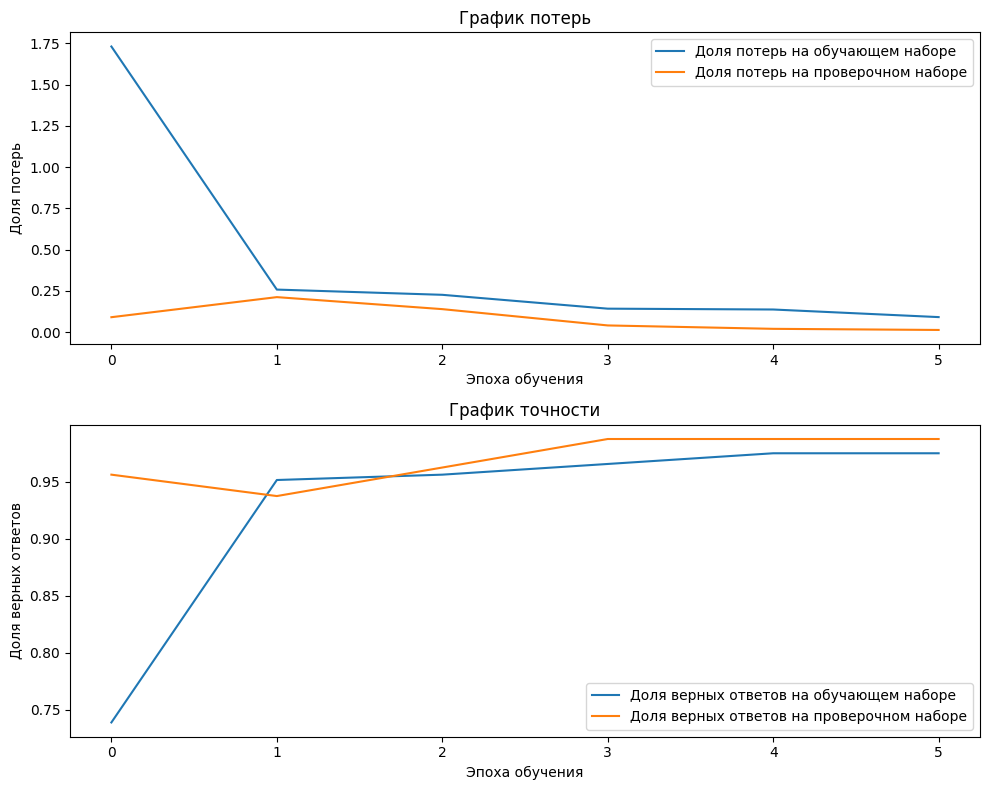

In [ ]:
# Значения потерь и точности из истории обучения
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# График с двумя подграфиками
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# График потерь
ax1.plot(train_loss, label='Доля потерь на обучающем наборе')
ax1.plot(val_loss, label='Доля потерь на проверочном наборе')
ax1.legend()
ax1.set_title('График потерь')
ax1.set_xlabel('Эпоха обучения')
ax1.set_ylabel('Доля потерь')

# График точности
ax2.plot(train_acc, label='Доля верных ответов на обучающем наборе')
ax2.plot(val_acc, label='Доля верных ответов на проверочном наборе')
ax2.legend()
ax2.set_title('График точности')
ax2.set_xlabel('Эпоха обучения')
ax2.set_ylabel('Доля верных ответов')

# Отображение графиков
plt.tight_layout()
plt.show()

## График confusion_matrix

confusion_matrix (матрица неточностей) позволяет отобразить количество правильно и неправильно классифицированных образцов для каждого класса.

### Test (36=18+18 исходные изображения)

2/2 [==============================] - 1s 765ms/step


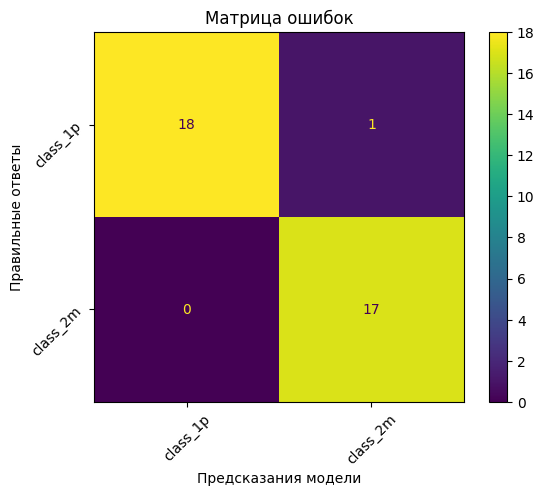

In [ ]:
# Импорт метода построения confusion_matrix
from sklearn.metrics import confusion_matrix
# Импорт метода визуализации confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# # Получение предсказанных значений модели для тестового набора данных
# y_pred = model.predict(test_generator)
y_pred = model.predict(x_test)
y_pred = np.round(y_pred).flatten()                    # округление до целых чисел и преобразование в одномерный массив

# # Получение истинных значений тестового набора данных
# y_test = test_generator.classes
# y_test = y_test

# Построение confusion matrix
cm = confusion_matrix(y_test, y_pred)

# # Визуализация матрицы ошибок
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Пластик', 'Метал'])
display_label = np.arange(len(TRAIN_CLASS_LIST))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = display_label)
disp.plot()

plt.title('Матрица ошибок')
plt.xticks(display_label, TRAIN_CLASS_LIST, rotation=45)
plt.yticks(display_label, TRAIN_CLASS_LIST, rotation=45)
plt.xlabel('Предсказания модели')
plt.ylabel('Правильные ответы')
plt.show()

Ось x - предсказания модели Ось y - правильные ответы

Пластик - class_1p |||| Метал - class_2m

Получаем:

18 раз модель предсказала пластик (правильный ответ пластик)

1 раза модель предсказала метал (правильный ответ пластик)

0 раз модель предсказала пластик (правильный ответ метал)

17 раза модель предсказала метал (правильный ответ метал)

### Test (144=72+72 изображений)

Увеличим входные тестовые данные с 36 = из первого класса (18исх)+из второго класса (18исх) до 144 = из первого класса (18исх+54аугм)+из второго класса (18исх+54аугм) изображений

5/5 [==============================] - 3s 727ms/step


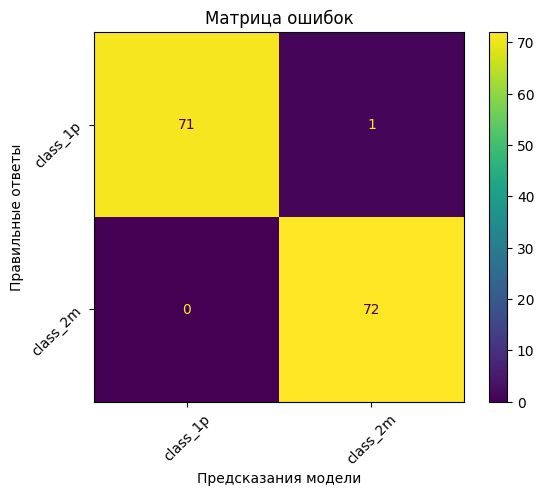

In [ ]:
# # Получение предсказанных значений модели для тестового набора данных
# y_pred = model.predict(test_generator)
Y_pred = model.predict(X_test)
Y_pred = np.round(Y_pred).flatten()                    # округление до целых чисел и преобразование в одномерный массив

# # Получение истинных значений тестового набора данных
# y_test = test_generator.classes
# y_test = y_test

# Построение confusion matrix
cm_a = confusion_matrix(Y_test, Y_pred)

# # Визуализация матрицы ошибок
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Пластик', 'Метал'])
display_label = np.arange(len(TEST_CLASS_LIST_a))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_a, display_labels = display_label)
disp.plot()

plt.title('Матрица ошибок')
plt.xticks(display_label, TEST_CLASS_LIST_a, rotation=45)
plt.yticks(display_label, TEST_CLASS_LIST_a, rotation=45)
plt.xlabel('Предсказания модели')
plt.ylabel('Правильные ответы')
plt.show()

71 раза модель предсказала пластик (правильный ответ пластик)

1 раза модель предсказала металл (правильный ответ пластик)

0 раз модель предсказала пластик (правильный ответ металл)

72 раза модель предсказала металл (правильный ответ металл)

**Вывод**: Модель с классом металл классифицирует (справляется) лучше.

## Расчет метрики precision

Метрика precision показывает: насколько хорошо модель способна отличать выбранный класс от всех остальных. Для этого количество правильных ответов для выбранного класса (71 для пластика) нужно разделить на количество примеров, когда модель предсказала выбранный класс пластик (71).

In [ ]:
# Где cm_a = confusion_matrix(Y_test, Y_pred)

# Расчет метрики precision для класса пластик
precision_class_p = cm_a[0,0] / sum(cm_a[:,0])
print('Метрика precision для класса пластик', precision_class_p)

# Расчет метрики precision для класса металл
precision_class_m = cm_a[1,1] / sum(cm_a[:,1])
print('Метрика precision для класса металл',precision_class_m)

Метрика precision для класса пластик 1.0
Метрика precision для класса металл 0.9863013698630136


**Вывод**: Модель отлично справляется с фильтрацией пластика от металла (100%), и чуть хуже в обратном случае, когда нужно отличить металл от пластика (98,6%)

## Метрика recall

Метрика recall показыает насколько хорошо модель в принципе способна находить выбранный класс. В случае этой метрики мы берем общеее количество правильных ответов выбранного класса пластик (71) и делим на общее количество примеров выбранного класса - пластик в проверочном наборе (71+1).

In [ ]:
# Расчет метрики recall для класса пластик
recall_class_p = cm_a[0,0] / sum(cm_a[0])
print('Метрика recall для класса пластик', recall_class_p)

# Расчет метрики recall для класса металл
recall_class_m = cm_a[1,1] / sum(cm_a[1])
print('Метрика recall для класса металл', recall_class_m)

Метрика recall для класса пластик 0.9861111111111112
Метрика recall для класса металл 1.0


После подсчета метрики для каждого класса, можно объединить их для получения результирующих метрик.

Есть различные подходы к подобному объединению. В sklearn'е реализовано два варианта.

1. С помощью простого среднего арифметического
2. С помощью взвешенного среднего арифметического

In [ ]:
# Расчет метрик через среднее арифметическое (_1)
precision_1 = (precision_class_p + precision_class_m) / 2
recall_1 = (recall_class_p + recall_class_m) / 2
print('Через среднее арифметическое:')
print(f'precision {precision_1}')
print(f'recall {recall_1}')

# Расчет метрик через среднее арифметическое взвешенное (_2)
precision_2 = (precision_class_p * sum(cm_a[0]) + precision_class_m * sum(cm_a[1])) / len(Y_test)
recall_2 = (recall_class_p * sum(cm_a[0]) + recall_class_m * sum(cm_a[1]))  / len(Y_test)
print('\nЧерез среднее арифметическое взвешенное:')
print(f'precision {precision_2}')
print(f'recall {recall_2}')

Через среднее арифметическое:
precision 0.9931506849315068
recall 0.9930555555555556

Через среднее арифметическое взвешенное:
precision 0.9931506849315068
recall 0.9930555555555556


## Метрика f1-score

Метрика f1-score является средним гармоническим между presicion и recall и расчитывается по формуле:


$f1 = 2 * \frac{recall *precision}{recall + precision}$

По аналогии метрика f1-score расчитывается для каждого класса отдельно, а затем через среднее арифметическое (простое или взвешанное) получается финальный результат

In [ ]:
# Расчет f1_score для класса пластик
f1_class_p = 2 * (precision_class_p * recall_class_p) / (precision_class_p + recall_class_p)

# Расчет f1_score для класса металл
f1_class_m = 2 * (precision_class_m * recall_class_m) / (precision_class_m + recall_class_m)

print('Через среднее арифметическое:')
print(f'Для пластика: {f1_class_p}')
print(f'Для металла: {f1_class_m}')

Через среднее арифметическое:
Для пластика: 0.993006993006993
Для металла: 0.993103448275862


In [ ]:
# Расчет f1-score через среднее арифметическое
f1_score_1 = (f1_class_p + f1_class_m) / 2

# Расчет f1-score через среднее арифметическое взвешенное
f1_score_2 = (f1_class_p *  sum(cm_a[0]) + f1_class_m  * sum(cm_a[1])) / len(Y_test)

print('Через среднее арифметическое:')
print(f'Для двух классов: {f1_score_1}')
print('\nЧерез среднее арифметическое взвешенное:')
print(f'Для двух классов: {f1_score_2}')

Через среднее арифметическое:
Для двух классов: 0.9930552206414276

Через среднее арифметическое взвешенное:
Для двух классов: 0.9930552206414275


### Метод precision_recall_fscore_support

Расчет метрик можно выполнить с помощью готового метода библиотеки sclearn

In [ ]:
# Импорт метода расчета метрик
from sklearn.metrics import precision_recall_fscore_support

metrics1 = precision_recall_fscore_support(Y_test, Y_pred, average='macro')

print(f'precision: {metrics1[0]}')
print(f'recall:    {metrics1[1]}')
print(f'f1_score:  {metrics1[2]}')

precision: 0.9931506849315068
recall:    0.9930555555555556
f1_score:  0.9930552206414276
